In [1]:
import numpy as np
import networkx as nx

#generalised laplacian matrix using social distance approach
def genlaplacian(G, x, nodelist=None):
    if x==0:
        D = nx.laplacian_matrix(G).toarray()
    else:
        D = nx.floyd_warshall_numpy(G, nodelist)
        rowsize = D.shape[0]
        for i in range(0, rowsize):
            for j in range(i+1, rowsize):
                if(D[i,j] ==1):
                    D[i,j]= D[j,i] = -1
                else:
                    D[i,j] = D[j,i] = -D[i,j]*(pow(x, (D[i,j]-1)))
            D[i,i] = -1*(D[i].sum())
    return D

In [2]:
import networkx as nx
import numpy as np
import itertools 

#function to compute k-path transformed laplacian based on the laplace 
#transform with lambda parameter
def Genlaplacian_laplace(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
#function to compute k-path transformed laplacian based on the mellin
#transform with s parameter
def Genlaplacian_mellin(G,s):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -(1/pow(k,s))
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

2.374747474747475


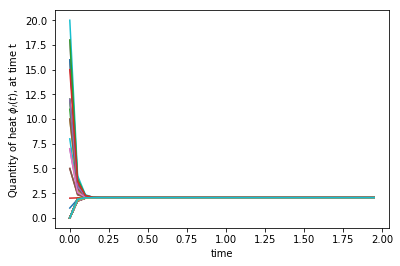

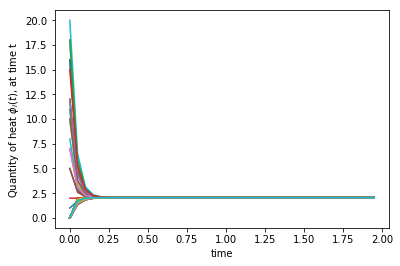

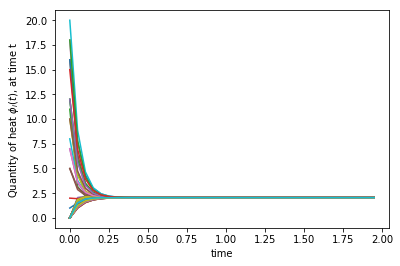

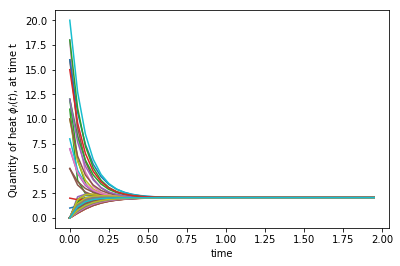

In [4]:
###Mellin transform diffusion for Barabasi network####

import scipy.linalg as LA
import random
import matplotlib.pyplot as plt
import itertools

n=100
m=4
G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
while (nx.is_connected(G)==False):                # check if network is connected
    G = nx.barabasi_albert_graph(n, m, seed=None)
    
print(nx.average_shortest_path_length(G))

s_lst =[1,1.5,2,3]                            #list of s values for mellin

phi_0 = [0]*n

for r in random.sample(range(0,n-1), 20):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = random.randint(0, 20)

i = 0
for  s in s_lst:
    if s==0:
        L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    else:
        L = Genlaplacian_mellin(G,s)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    time = np.arange(0,2,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat $\phi_i(t)$, at time t')
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    plt.show()

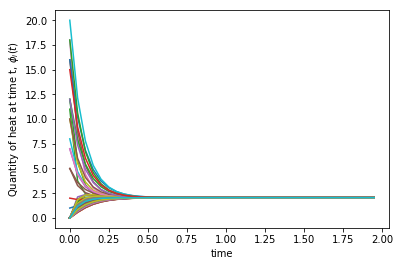

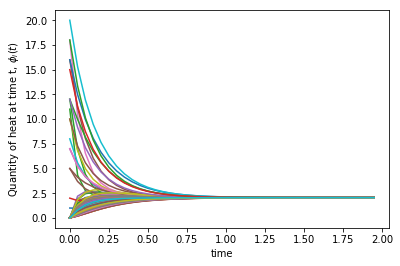

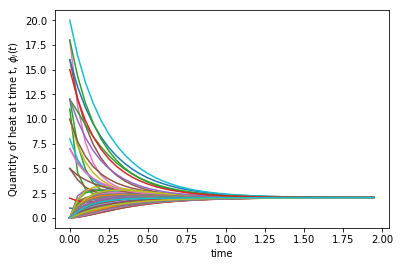

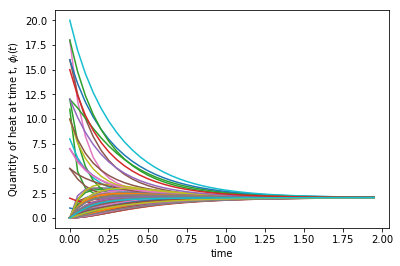

In [5]:
### Diffusiion of Barabasi network with Laplace tranforms ####

lam_lst =[1,1.5,2,3]                            #list of lambda values for laplace

#phi_0 = []
#for l in range(0,n):                        #set intitial heat content, phi_0 by random values
    #phi_0.append(random.randint(0, 50))

i=0    
for  lam in lam_lst:
    if lam ==0:
        L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    else:
        L = Genlaplacian_laplace(G,lam)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[] 
    time = np.arange(0,2,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
    #plt.title('Diffusion of heat over barabasi network for Laplace transform at $\lambda$='+str(lam))
    plt.show()

2.336969696969697


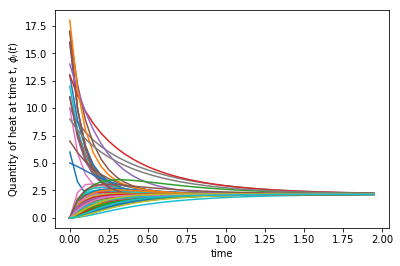

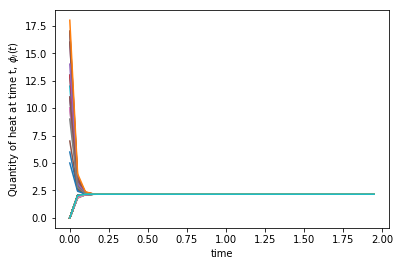

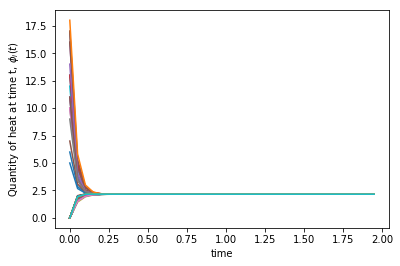

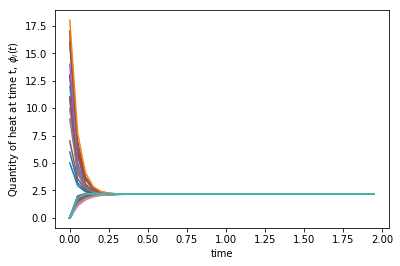

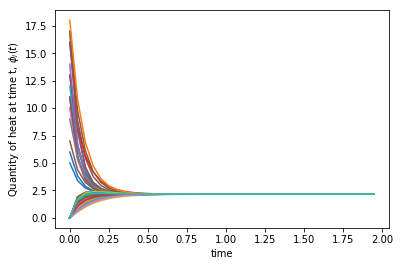

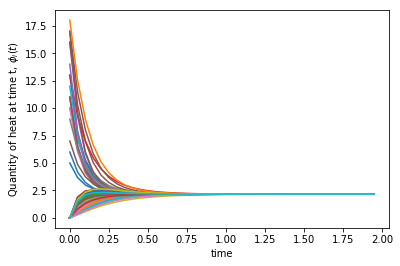

In [6]:

###Mellin transform diffusion for E-R network####

import scipy.linalg as LA
import random
import matplotlib.pyplot as plt

n=100
p =0.09
G = nx.gnp_random_graph(n, p, seed=None, directed=False)     #Create Barabasi network
while (nx.is_connected(G)==False):                      # check if network is connected
    G = nx.gnp_random_graph(n, p, seed=None, directed=False)

print(nx.average_shortest_path_length(G))

s_lst =[0,1,1.5,2,3,4]                            #list of s values for mellin

phi_0 = [0]*n

for r in random.sample(range(0,n-1), 20):                        #set intitial heat content, phi_0 by random values
    phi_0[r] = random.randint(0, 20)
    
for  s in s_lst:
    if s==0:
        L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    else:
        L = Genlaplacian_mellin(G,s)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    time = np.arange(0,2.0,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
    #plt.title('Diffusion of heat over barabasi network with Mellin transform at s='+str(s))
    plt.show()

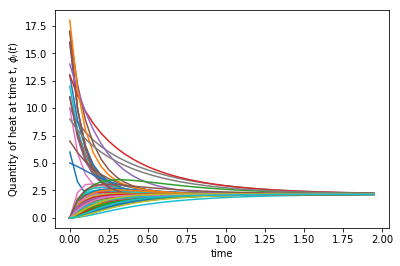

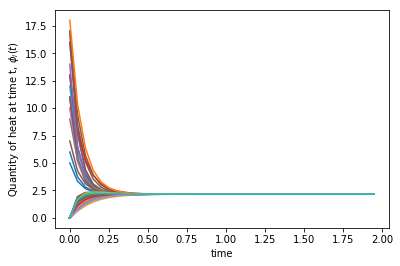

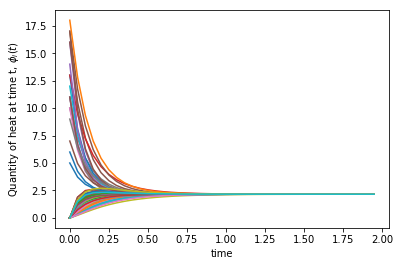

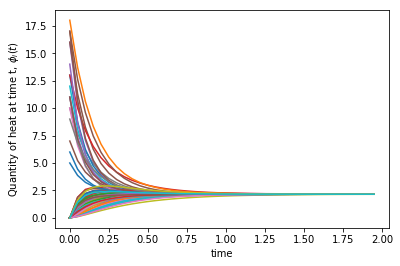

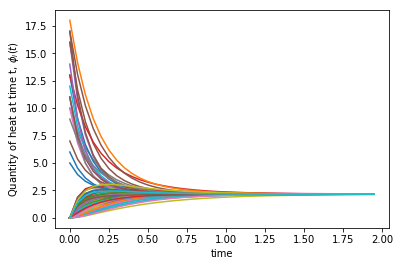

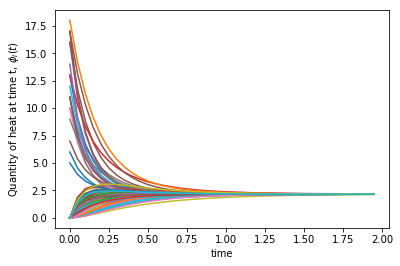

In [10]:
#### Diffusion on ER network for laplace transforms

lam_lst = [0,1,1.5,2,3,4]

for  lam in lam_lst:
    if lam==0:
        L = nx.laplacian_matrix(G).todense()   # to cater for no longrange interactions
    else:
        L = Genlaplacian_laplace(G,lam)
    D, V = LA.eigh(L);                              #Compute the eigenvalues/vectors of the laplacian matrix
    D = np.reshape(D,(n,1), order='F')
    phi_0 = np.reshape(phi_0,(n,1), order='F');
    phi_0V = np.dot((V.conj().transpose()),phi_0) #Transform the initial condition into the coordinate system of the eigenvectors

    #plotting results
    phi_lst=[]   
    time = np.arange(0,2.0,0.05)
    for t in time :                             #Loop through times and decay each initial component
        Phi = (phi_0V* (np.exp(-D*t)));         #Exponential decay for each component
        Phi = np.dot(V,Phi);  
        #Phi =  np.reshape(Phi, (1,n), order='F')                #shape phi to a lattice shape
        phi_lst.append((Phi.ravel()).tolist())

    plt.plot(time,phi_lst)
    plt.xlabel('time')
    plt.ylabel('Quantity of heat at time t, $\phi_i(t)$')
    #plt.title('Diffusion of heat over E-Rnetwork with Mellin transform at $\lambda$='+str(lam))
    plt.show()

In [33]:
import random
l = [0]*5
r = random.sample(range(0,4), 3)
for rr in r:
    l[rr] = random.randint(1, 20)
l

[8, 6, 18, 0, 0]